# Short range Linear T sweep figure for short paper

In [2]:
%load_ext autoreload
%autoreload 2

In [11]:
from pathlib import Path
import numpy as np
import os
from matplotlib import pyplot as plt
import matplotlib as mpl
from time import time
from munch import Munch

from itertools import count
from matplotlib import colors

from FKMC.general import index_histogram_array, sort_IPRs, smooth, shapes
from FKMC.import_funcs import get_data_structured, get_data_funcmap, mean_over_MCMC, IPRandDOS
from multiprocessing import Pool
import shutil
import pickle 

%matplotlib inline
np.seterr(all='warn')
textwidth = 6.268
mpl.rcParams['figure.dpi'] = 70
default_figargs = dict(figsize = (textwidth,textwidth))

import logging
mpl_logger = logging.getLogger('matplotlib')
mpl_logger.setLevel(logging.WARNING) 

import_log = logging.getLogger('FKMC.import_funcs')
import_log.setLevel(logging.WARNING)

In [5]:
def load_data(data_ids):

    obs = {i : get_data_structured(Path(f'/data/users/tch14/slurm_runs/{i}'),
                    requested_observables = ['Mf_moments','eigenvals', 'IPRs', 'state'],
                    structure_names = ('Ts','repeats','initial_state'),
                    structure_dims = (None, 10, 4),
                   )
           for i in data_ids}
    
    return obs

def concat_data(obs):
    ob = Munch()
    single_run = next(iter(obs.values()))
    print(single_run.keys())
    
    #copy all of the stuff that doesn't change over
    for key in ['Ns', 'parameters', 'MCMC_params', 'desc', 'structure_names', 'structure_dims', 'hints']:
        ob[key] = single_run[key]
        
    
    ob.Ts = np.concatenate([o.Ts for o in obs.values() if o], axis = 0)
    
    ob.Mf_moments = np.concatenate([o.Mf_moments for o in obs.values() if o], axis = 1)
    

    #o_orig.E_vals = [np.concatenate([a.eigenvals[i] for a in obs.values() if a], axis = 0) for i in range(len(o_orig.Ns))]
    #o_orig.IPRs = [np.concatenate([a.IPRs[i] for a in obs.values() if a], axis = 0) for i in range(len(o_orig.Ns))]

    ob.E_vals = np.concatenate([a.eigenvals[i] for a in obs.values() if a], axis = 0)
    ob.IPRs = np.concatenate([a.IPRs[i] for a in obs.values() if a], axis = 0)
    
    return ob


def save_correlation_functions():
    pass
            
import pickle

def save_data(filename, data):
    with open(filename, 'wb') as file:
        pickle.dump(data, file, pickle.HIGHEST_PROTOCOL)
        print('Pickling Successful')
    
#SR_raw = load_data(short_range_ids)
#SR_concat = concat_data(SR_raw)
#del SR_raw
#save_data('./short_range_linear_T.npz', SR_concat)



In [29]:
bigger_U_ids = [131722, 131719, 131718, 131717, 131716, 129519, 129518, 129462]
big_U_raw = load_data(bigger_U_ids)

CRITICAL:FKMC.import_funcs:looking in /data/users/tch14/slurm_runs/131722

0 3 6 9 12 15 18 21 24 27 30 33 36 39 42 45 48 51 54 57 60 63 66 69 72 75 78 81 84 87 90 93 96 99 102 105 108 111 114 117 120 123 126 129 132 135 138 141 144 147 150 153 156 CRITICAL:FKMC.import_funcs:looking in /data/users/tch14/slurm_runs/131719
0 20 40 60 80 100 120 140 160 180 200 220 240 260 280 300 320 340 360 380 400 420 440 460 480 500 520 540 560 580 600 620 640 660 680 700 720 740 760 780 800 820 840 860 880 900 920 940 960 980 CRITICAL:FKMC.import_funcs:looking in /data/users/tch14/slurm_runs/131718
0 20 40 60 80 100 120 140 160 180 200 220 240 260 280 300 320 340 360 380 400 420 440 460 480 500 520 540 560 580 600 620 640 660 680 700 720 740 760 780 800 820 840 860 880 900 920 940 960 980 CRITICAL:FKMC.import_funcs:looking in /data/users/tch14/slurm_runs/131717
0 20 40 60 80 100 120 140 160 180 200 220 240 260 280 300 320 340 360 380 400 420 440 460 480 500 520 540 560 580 600 620 640 660 680 700 720

In [ ]:
save_DOS_and_IPR_means('/data/users/tch14/pickled_data/Bigger_U_IPR_and_DOS_processed.pickle', raw_data = big_U_raw)

In [ ]:
del big_U_raw

In [5]:
short_range_ids = [108646, 110591, 111591, 112592, 112645, 112646, 112647, 112648]
SR_raw = load_data(short_range_ids)

CRITICAL:FKMC.import_funcs:looking in /data/users/tch14/slurm_runs/108646
0 20 40 60 80 100 120 140 160 180 200 220 240 260 280 300 320 340 360 380 400 420 440 460 480 500 520 540 560 580 600 620 640 660 680 700 720 740 760 780 800 820 840 860 880 900 920 940 960 980 CRITICAL:FKMC.import_funcs:looking in /data/users/tch14/slurm_runs/110591
0 20 40 60 80 100 120 140 160 180 200 220 240 260 280 300 320 340 360 380 400 420 440 460 480 500 520 540 560 580 600 620 640 660 680 700 720 740 760 780 800 820 840 860 880 900 920 940 960 980 CRITICAL:FKMC.import_funcs:looking in /data/users/tch14/slurm_runs/111591
0 20 40 60 80 100 120 140 160 180 200 220 240 260 280 300 320 340 360 380 400 420 440 460 480 500 520 540 560 580 600 620 640 660 680 700 720 740 760 780 800 820 840 860 880 900 920 940 960 980 CRITICAL:FKMC.import_funcs:looking in /data/users/tch14/slurm_runs/112592
0 20 40 60 80 100 120 140 160 180 200 220 240 260 280 300 320 340 360 380 400 420 440 460 480 500 520 540 560 580 600 620 

In [12]:
save_DOS_and_IPR_means('/data/users/tch14/pickled_data/Short_range_IPR_and_DOS_processed.pickle', raw_data = SR_raw)

dict_keys(['total_size', 'Mf_moments', 'eigenvals', 'IPRs', 'Ns', 'Ts', 'parameters', 'MCMC_params', 'desc', 'structure_names', 'structure_dims', 'hints', 'T'])
IPRs.shape = (200, 16000), E_vals.shape = (200, 16000)
Pickling Successful
IPRs.shape = (200, 32000), E_vals.shape = (200, 32000)
Pickling Successful
IPRs.shape = (200, 64000), E_vals.shape = (200, 64000)
Pickling Successful
IPRs.shape = (200, 128000), E_vals.shape = (200, 128000)
Pickling Successful
IPRs.shape = (200, 256000), E_vals.shape = (200, 256000)
Pickling Successful
IPRs.shape = (200, 512000), E_vals.shape = (200, 512000)
Pickling Successful


In [17]:
SR_concat = concat_data(SR_raw)

dict_keys(['total_size', 'Mf_moments', 'eigenvals', 'IPRs', 'Ns', 'Ts', 'parameters', 'MCMC_params', 'desc', 'structure_names', 'structure_dims', 'hints', 'T'])


In [21]:
save_data('/data/users/tch14/pickled_data/Short_range_linear_T.pickle', SR_concat)

Pickling Successful


In [24]:
del SR_raw

NameError: name 'SR_raw' is not defined

In [25]:
del SR_concat

NameError: name 'SR_concat' is not defined

In [8]:
long_range_ids = [119700 + i for i in [33, 34, 37, 39, 41, 42, 44, 45]]
LR_raw = load_data(long_range_ids)

CRITICAL:FKMC.import_funcs:looking in /data/users/tch14/slurm_runs/119733
0 20 40 60 80 100 120 140 160 180 200 220 240 260 280 300 320 340 360 380 400 420 440 460 480 500 520 540 560 580 600 620 640 660 680 700 720 740 760 780 800 820 840 860 880 900 920 940 960 980 CRITICAL:FKMC.import_funcs:looking in /data/users/tch14/slurm_runs/119734
0 20 40 60 80 100 120 140 160 180 200 220 240 260 280 300 320 340 360 380 400 420 440 460 480 500 520 540 560 580 600 620 

KeyboardInterrupt: 

In [10]:
def save_DOS_and_IPR_means(filename, raw_data):
    ob = Munch()
    single_run = next(iter(raw_data.values()))
    print(single_run.keys())
    
    #copy all of the stuff that doesn't change over
    for key in ['Ns', 'parameters', 'MCMC_params', 'desc', 'structure_names', 'structure_dims', 'hints']:
        ob[key] = single_run[key]
        
    ob.Ts = np.concatenate([o.Ts for o in raw_data.values() if o], axis = 0)
    #si = np.argsort(ob.Ts)
    #ob.Ts = ob.Ts[si]

    
    ob.E_bins = np.linspace(-6, 6, 2000 + 1)
    ob.E_hist = [None for N in ob.Ns]
    ob.IPR_hist = [None for N in ob.Ns]
    
    return None

    for i, N in enumerate(ob.Ns):
        E_vals = np.concatenate([a.eigenvals[i] for a in raw_data.values() if a], axis = 0)
        IPRs = np.concatenate([a.IPRs[i] for a in raw_data.values() if a], axis = 0)

        #use this to select specific initial states if necessary 

        
        newshape = E_vals.shape[0:1] + (-1,)
        IPRs = IPRs.reshape(*newshape)
        E_vals = E_vals.reshape(*newshape)

        shapes(IPRs=IPRs, E_vals = E_vals)

        
        ob.E_hist[i], _, indices = index_histogram_array(ob.E_bins, E_vals)
        ob.IPR_hist[i] = sort_IPRs(indices, IPRs, ob.E_bins)
        
    with open(filename, 'wb') as file:
            pickle.dump(ob, file, pickle.HIGHEST_PROTOCOL)
            print('Pickling Successful')

save_DOS_and_IPR_means('/data/users/tch14/pickled_data/Long_range_IPR_and_DOS_processed.pickle', raw_data = LR_raw)

dict_keys(['total_size', 'Mf_moments', 'eigenvals', 'IPRs', 'Ns', 'Ts', 'parameters', 'MCMC_params', 'desc', 'structure_names', 'structure_dims', 'hints', 'T'])
IPRs.shape = (200, 16000), E_vals.shape = (200, 16000)
IPRs.shape = (200, 32000), E_vals.shape = (200, 32000)
IPRs.shape = (200, 64000), E_vals.shape = (200, 64000)
IPRs.shape = (200, 128000), E_vals.shape = (200, 128000)
IPRs.shape = (200, 256000), E_vals.shape = (200, 256000)
IPRs.shape = (200, 512000), E_vals.shape = (200, 512000)
Pickling Successful


In [28]:
LR_concat = concat_data(LR_raw)

dict_keys(['total_size', 'Mf_moments', 'eigenvals', 'IPRs', 'Ns', 'Ts', 'parameters', 'MCMC_params', 'desc', 'structure_names', 'structure_dims', 'hints', 'T'])


In [29]:
save_data('/data/users/tch14/pickled_data/Long_range_linear_T.pickle', LR_concat)

Pickling Successful


In [30]:
del LR_raw

In [31]:
del LR_concat

In [ ]:
LR_raw[0]

dict_keys(['total_size', 'Mf_moments', 'eigenvals', 'IPRs', 'state', 'Ns', 'Ts', 'parameters', 'MCMC_params', 'desc', 'structure_names', 'structure_dims', 'hints', 'T'])
ob.hints.state = ('Ns', 'Ts', 'repeats', 'initial_state', 'MCstep', 'N')
[ 0.5 -0.5  0.5 -0.5]
[ 0.5 -0.5  0.5 -0.5  0.5 -0.5  0.5 -0.5]
[-0.5  0.5 -0.5  0.5 -0.5  0.5 -0.5  0.5 -0.5  0.5 -0.5  0.5 -0.5  0.5
 -0.5  0.5]
[ 0.5 -0.5  0.5 -0.5  0.5 -0.5  0.5 -0.5  0.5 -0.5  0.5 -0.5  0.5 -0.5
  0.5 -0.5  0.5 -0.5  0.5 -0.5  0.5 -0.5  0.5 -0.5  0.5 -0.5  0.5 -0.5
  0.5 -0.5  0.5 -0.5]
[-0.5  0.5 -0.5  0.5 -0.5  0.5 -0.5  0.5 -0.5  0.5 -0.5  0.5 -0.5  0.5
 -0.5  0.5 -0.5  0.5 -0.5  0.5 -0.5  0.5 -0.5  0.5 -0.5  0.5 -0.5  0.5
 -0.5  0.5 -0.5  0.5 -0.5  0.5 -0.5  0.5 -0.5  0.5 -0.5  0.5 -0.5  0.5
 -0.5  0.5 -0.5  0.5 -0.5  0.5 -0.5  0.5 -0.5  0.5 -0.5  0.5 -0.5  0.5
 -0.5  0.5 -0.5  0.5 -0.5  0.5 -0.5  0.5]
[-0.5  0.5 -0.5  0.5 -0.5  0.5 -0.5  0.5 -0.5  0.5 -0.5  0.5 -0.5  0.5
 -0.5  0.5 -0.5  0.5 -0.5  0.5 -0.5  0.5 -0.5  0.

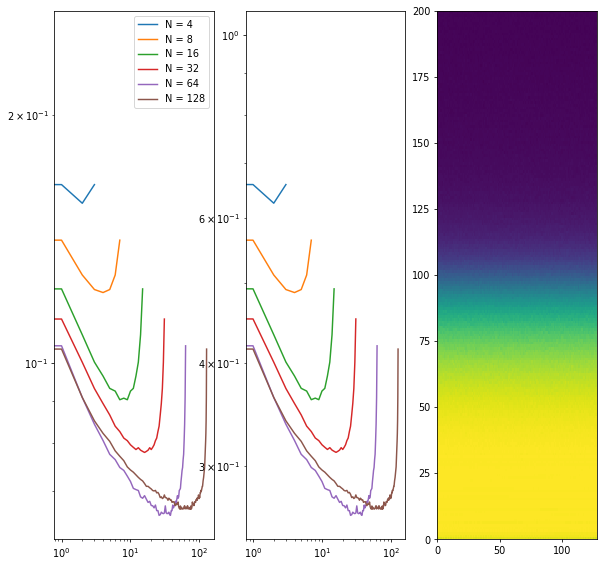

In [29]:
from FKMC.general import solve_H_vectorised, diag2column, spread
from itertools import count

def save_correlation_functions(filename, raw_data):
    ob = Munch()
    single_run = next(iter(raw_data.values()))
    print(single_run.keys())
    
    #copy all of the stuff that doesn't change over
    for key in ['Ns', 'parameters', 'MCMC_params', 'desc', 'structure_names', 'structure_dims', 'hints']:
        ob[key] = single_run[key]
        
    ob.Ts = np.concatenate([o.Ts for o in raw_data.values() if o], axis = 0)
    
    print(f'ob.hints.state = {ob.hints.state}')
    
    #ob.E_bins = np.linspace(-6, 6, 2000 + 1)
    #ob.E_hist = [None for N in ob.Ns]
    #ob.IPR_hist = [None for N in ob.Ns]
    ob.C = [None for N in ob.Ns]
    ob.R = [None for N in ob.Ns]
    
    ob.hints.C = ('Ts', 'repeats', 'N')
    ob.hints.R = ('Ts', 'repeats', 'N')
    
    f, axes = plt.subplots(1, 3, figsize = (10,10))
    
    for i, N in zip(count(), ob.Ns):
        '''
        E_vals = np.concatenate([a.eigenvals[i] for a in raw_data.values() if a], axis = 0)
        IPRs = np.concatenate([a.IPRs[i] for a in raw_data.values() if a], axis = 0)

        #use this to select specific initial states if necessary 

        newshape = E_vals.shape[0:1] + (-1,)
        IPRs = IPRs.reshape(*newshape)
        E_vals = E_vals.reshape(*newshape)

        shapes(IPRs=IPRs, E_vals = E_vals)

        
        ob.E_hist[i], _, indices = index_histogram_array(ob.E_bins, E_vals)
        ob.IPR_hist[i] = sort_IPRs(indices, IPRs, ob.E_bins)
        '''
        state = np.concatenate([a.state[i] for a in raw_data.values() if a], axis = 0)
        state = state - 1/2
        
        print(state[0, 0, 0, 0, :]) #zeros and ones
        sT, srepeats, sinitial, sMCstep, sN = state.shape
        state = state.reshape(sT, srepeats*sinitial*sMCstep, sN)
        
        alternating = 2*(np.arange(sN) % 2) - 1
        state = state * alternating
        
        
        #do it for each temperature
        ob.C[i] = np.array([diag2column(np.cov(state[j], rowvar = False)) for j in range(sT)])
        ob.R[i] = np.array([diag2column(np.corrcoef(state[j], rowvar = False)) for j in range(sT)])
        
        axes[0].loglog(ob.C[i][100].mean(axis = 0), label = f'N = {N}')
        axes[1].loglog(ob.R[i][100].mean(axis = 0))

        
    #axes[2].loglog(C[0, : ], label = 'Correlator')
    axes[0].legend()
    print(ob.R[-1].shape)
    axes[2].pcolormesh(ob.R[-1].mean(axis = 2))
        
        
    with open(filename, 'wb') as file:
            pickle.dump(ob, file, pickle.HIGHEST_PROTOCOL)
            print('Pickling Successful')

save_correlation_functions('/data/users/tch14/pickled_data/Long_range_linear_T_correlation_funcs.pickle', LR_raw)

In [8]:
def load(i): 
    #copy stuff to the workspace for faster file access
    p = Path(f'/workspace/tch14/slurm_runs_scratch/{i}')
    if not p.exists():
        logger.info(f'Copying {i} into workspace first.')
        t = time()
        original = Path(f'/data/users/tch14/slurm_runs/{i}')
        shutil.copytree(src = original, dst = p)
        logger.info(f'Took {time() - t:.0f}s to do the copy.')
    
    return get_data_funcmap(p,
                functions = [IPRandDOS(), mean_over_MCMC('Mf_moments')],
                structure_names = ('Ts','repeats','initial_state'),
                structure_dims = (None, 10, 4),
               )

def load_data(data_ids):
    return {i : load(i) for i in data_ids}

def load_data_multi(data_ids):
    with Pool(6) as p:
        data = p.map(load, data_ids)
        obs = {i : d for i, d in zip(data_ids, data)}
    return obs

In [5]:
%%time
logger = logging.getLogger('FKMC.import_funcs')
logger.setLevel(logging.INFO) 
long_range_ids = [119700 + i for i in [33, 34, 37, 39, 41, 42, 44, 45]]
LR_raw = load_data_multi(long_range_ids)
print('Done!')

CRITICAL:FKMC.import_funcs:looking in /workspace/tch14/slurm_runs_scratch/119742
CRITICAL:FKMC.import_funcs:looking in /workspace/tch14/slurm_runs_scratch/119739
CRITICAL:FKMC.import_funcs:looking in /workspace/tch14/slurm_runs_scratch/119741
CRITICAL:FKMC.import_funcs:looking in /workspace/tch14/slurm_runs_scratch/119733
CRITICAL:FKMC.import_funcs:looking in /workspace/tch14/slurm_runs_scratch/119737
CRITICAL:FKMC.import_funcs:looking in /workspace/tch14/slurm_runs_scratch/119734
INFO:FKMC.import_funcs:job ids range from 0 to 999
INFO:FKMC.import_funcs:job ids range from 0 to 999
INFO:FKMC.import_funcs:job ids range from 0 to 999
INFO:FKMC.import_funcs:job ids range from 0 to 999
INFO:FKMC.import_funcs:job ids range from 0 to 999
INFO:FKMC.import_funcs:job ids range from 0 to 999
INFO:FKMC.import_funcs:structure_names = ('Ts', 'repeats', 'initial_state')
INFO:FKMC.import_funcs:structure_dims = (25, 10, 4)
INFO:FKMC.import_funcs:Expected number of jobs 1000
INFO:FKMC.import_funcs:Logge

In [20]:
LR_raw.keys()

dict_keys([119733, 119734, 119737, 119739, 119741, 119742, 119744, 119745])

In [6]:
def concat_data(obs):
    ob = Munch()
    single_run = next(iter(obs.values()))
    print(single_run.keys())

    #copy all of the stuff that doesn't change over
    for key in ['Ns', 'parameters', 'MCMC_params', 'desc', 'structure_names', 'structure_dims', 'hints', 'E_bins']:
        ob[key] = single_run[key]
        
    for name in ['Ts']:
        ob[name] = np.concatenate([o[name] for o in obs.values() if o], axis = 0)
    
    #the below have shape ('Ns', 'Ts', 'repeats', 'initial_state', 'energy index') 
    #so we need to concat along the 2nd axis
    concat_axis = 1
    for name in ['DOS', 'IPR', 'dIPR', 'dDOS', 'Mf_moments']:
        print(f'Copying {name}')
        ob[name] = np.concatenate([o[name] for o in obs.values() if o], axis = concat_axis)

    
    return ob

ob = concat_data(LR_raw)
save_data(data = ob, filename = '/workspace/tch14/pickled_data/Long_range_linear_T_sweep_IPR_DOS_and_errors.pickle')

dict_keys(['E_bins', 'IPR', 'DOS', 'dIPR', 'dDOS', 'Mf_moments', 'sigma_Mf_moments', 'Ns', 'Ts', 'parameters', 'MCMC_params', 'desc', 'structure_names', 'structure_dims', 'hints', 'T'])
Copying DOS
Copying IPR
Copying dIPR
Copying dDOS
Copying Mf_moments
Pickling Successful


In [61]:
i = 153974
d = get_data_funcmap(Path(f'/data/users/tch14/slurm_runs/{i}'),
                functions = [IPRandDOS(), mean_over_MCMC('Mf_moments')],
                structure_names = ('repeats','initial_state', 'Ts'),
                structure_dims = (2, 3, None),
               )
save_data(data = d, filename = '/workspace/tch14/pickled_data/High_Temp_IPR_DOS_and_errors.pickle')

CRITICAL:FKMC.import_funcs:looking in /data/users/tch14/slurm_runs/153974
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 Pickling Successful


Pickling Successful


In [8]:
i = 154077
d = get_data_funcmap(Path(f'/data/users/tch14/slurm_runs/{i}'),
                functions = [IPRandDOS(), mean_over_MCMC('Mf_moments')],
                structure_names = ('repeats','initial_state', 'Ts'),
                structure_dims = (1, 3, None),
               )
save_data(data = d, filename = '/workspace/tch14/pickled_data/High_Temp_IPR_DOS_and_errors_2.pickle')

CRITICAL:FKMC.import_funcs:looking in /data/users/tch14/slurm_runs/154077
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 Pickling Successful


In [53]:
d.Ts

array([100,  50,  10,   5])

In [14]:
## multi T mutli U data
def load(i): 
    #copy stuff to the workspace for faster file access
    p = Path(f'/workspace/tch14/slurm_runs_scratch/{i}')
    if not p.exists():
        logger.info(f'Copying {i} into workspace first.')
        t = time()
        original = Path(f'/data/users/tch14/slurm_runs/{i}')
        shutil.copytree(src = original, dst = p)
        logger.info(f'Took {time() - t:.0f}s to do the copy.')
    
    return get_data_funcmap(p,
                functions = [IPRandDOS(E_bins = np.linspace(-10, 10, 2000 + 1)), mean_over_MCMC('Mf_moments')],
                structure_names = ('repeats','Us','Ts'),
               )

logger = logging.getLogger('FKMC.import_funcs')
logger.setLevel(logging.INFO) 
multiTmultiU_obs = load(154259)

In [15]:
with open('/workspace/tch14/pickled_data/multiUmultiT_highT.pickle', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(multiTmultiU_obs, f, pickle.HIGHEST_PROTOCOL)
    print('Pickling Successful')

Pickling Successful
